In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/athlete_events.csv')
df_region = pd.read_csv('/content/noc_regions.csv')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
df_region.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [ ]:
df = df[df['Season']=='Summer']
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN


In [ ]:
df_region['NOC'] = df_region['NOC'].astype(str)
merged_df = df_region.merge(df,left_on='NOC',right_on='NOC')
merged_df.head()

,NOC,region,notes,ID,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Event,Medal
0,AFG,Afghanistan,NaN,502,Ahmad Shah Abouwi,M,NaN,NaN,NaN,Afghanistan,1956 Summer,1956,Summer,Melbourne,Hockey,Hockey Men's Hockey,NaN
1,AFG,Afghanistan,NaN,1076,Jammal-ud-Din Affendi,M,28.0,NaN,NaN,Afghanistan,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,NaN
2,AFG,Afghanistan,NaN,1101,Mohammad Anwar Afzal,M,NaN,NaN,NaN,Afghanistan,1948 Summer,1948,Summer,London,Football,Football Men's Football,NaN
3,AFG,Afghanistan,NaN,1745,Mohammad Aktar,M,17.0,156.0,48.0,Afghanistan,1980 Summer,1980,Summer,Moskva,Wrestling,"Wrestling Men's Light-Flyweight, Freestyle",NaN
4,AFG,Afghanistan,NaN,4628,Mohammad Daoud Anwary,M,22.0,NaN,NaN,Afghanistan,1964 Summer,1964,Summer,Tokyo,Wrestling,"Wrestling Men's Bantamweight, Freestyle",NaN


In [ ]:
merged_df.duplicated().sum()

np.int64(1385)

In [ ]:
merged_df.drop_duplicates(inplace = True)

In [ ]:
merged_df = pd.concat([merged_df,pd.get_dummies(merged_df['Medal']).astype(int)],axis=1)
merged_df.head()

,NOC,region,notes,ID,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Event,Medal,Bronze,Gold,Silver
0,AFG,Afghanistan,NaN,502,Ahmad Shah Abouwi,M,NaN,NaN,NaN,Afghanistan,1956 Summer,1956,Summer,Melbourne,Hockey,Hockey Men's Hockey,NaN,0,0,0
1,AFG,Afghanistan,NaN,1076,Jammal-ud-Din Affendi,M,28.0,NaN,NaN,Afghanistan,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,NaN,0,0,0
2,AFG,Afghanistan,NaN,1101,Mohammad Anwar Afzal,M,NaN,NaN,NaN,Afghanistan,1948 Summer,1948,Summer,London,Football,Football Men's Football,NaN,0,0,0
3,AFG,Afghanistan,NaN,1745,Mohammad Aktar,M,17.0,156.0,48.0,Afghanistan,1980 Summer,1980,Summer,Moskva,Wrestling,"Wrestling Men's Light-Flyweight, Freestyle",NaN,0,0,0
4,AFG,Afghanistan,NaN,4628,Mohammad Daoud Anwary,M,22.0,NaN,NaN,Afghanistan,1964 Summer,1964,Summer,Tokyo,Wrestling,"Wrestling Men's Bantamweight, Freestyle",NaN,0,0,0


## Analysing medal tally

In [ ]:
merged_df.drop_duplicates(['Team','NOC','Games','Year','Season','City','Sport','Event','Medal'],inplace = True)
merged_df.head(15)

,NOC,region,notes,ID,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Event,Medal,Bronze,Gold,Silver
0,AFG,Afghanistan,NaN,502,Ahmad Shah Abouwi,M,NaN,NaN,NaN,Afghanistan,1956 Summer,1956,Summer,Melbourne,Hockey,Hockey Men's Hockey,NaN,0,0,0
1,AFG,Afghanistan,NaN,1076,Jammal-ud-Din Affendi,M,28.0,NaN,NaN,Afghanistan,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,NaN,0,0,0
2,AFG,Afghanistan,NaN,1101,Mohammad Anwar Afzal,M,NaN,NaN,NaN,Afghanistan,1948 Summer,1948,Summer,London,Football,Football Men's Football,NaN,0,0,0
3,AFG,Afghanistan,NaN,1745,Mohammad Aktar,M,17.0,156.0,48.0,Afghanistan,1980 Summer,1980,Summer,Moskva,Wrestling,"Wrestling Men's Light-Flyweight, Freestyle",NaN,0,0,0
4,AFG,Afghanistan,NaN,4628,Mohammad Daoud Anwary,M,22.0,NaN,NaN,Afghanistan,1964 Summer,1964,Summer,Tokyo,Wrestling,"Wrestling Men's Bantamweight, Freestyle",NaN,0,0,0
5,AFG,Afghanistan,NaN,5285,Mohammad Arref,M,NaN,NaN,52.0,Afghanistan,1972 Summer,1972,Summer,Munich,Wrestling,"Wrestling Men's Flyweight, Freestyle",NaN,0,0,0
10,AFG,Afghanistan,NaN,5844,Mohammad Y. Attai,M,NaN,NaN,NaN,Afghanistan,1948 Summer,1948,Summer,London,Hockey,Hockey Men's Hockey,NaN,0,0,0
11,AFG,Afghanistan,NaN,6261,Mohammad Aynutdin,M,25.0,160.0,52.0,Afghanistan,1980 Summer,1980,Summer,Moskva,Wrestling,"Wrestling Men's Flyweight, Freestyle",NaN,0,0,0
12,AFG,Afghanistan,NaN,6280,Kayum Ayub,M,21.0,176.0,78.0,Afghanistan,1968 Summer,1968,Summer,Mexico City,Wrestling,"Wrestling Men's Welterweight, Freestyle",NaN,0,0,0
15,AFG,Afghanistan,NaN,6336,Masoud Azizi,M,19.0,168.0,64.0,Afghanistan,2004 Summer,2004,Summer,Athina,Athletics,Athletics Men's 100 metres,NaN,0,0,0


In [ ]:
medal_tally = merged_df.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending = False).reset_index()
medal_tally.head()

,NOC,Gold,Silver,Bronze
0,USA,1035,802,708
1,URS,394,317,294
2,GBR,278,317,300
3,GER,235,261,283
4,FRA,234,256,287


In [ ]:
medal_tally['Total'] = medal_tally['Gold'] + medal_tally['Silver'] + medal_tally['Bronze']
medal_tally.head()

,NOC,Gold,Silver,Bronze,Total
0,USA,1035,802,708,2545
1,URS,394,317,294,1005
2,GBR,278,317,300,895
3,GER,235,261,283,779
4,FRA,234,256,287,777


In [ ]:
def fetch_medal_tally(year,country):
  if year == 'Overall' and country == 'Overall':
    temp_df = merged_df
  if year == 'Overall' and country != 'Overall':
    temp_df = merged_df[merged_df['region'] == country]
  if year != 'Overall' and country == 'Overall':
     temp_df =merged_df[merged_df['Year'] == int(year)]
  if year != 'Overall' and country != 'Overall':
     temp_df = merged_df[(merged_df['Year'] == int(year)) & (merged_df['region'] == country)]

  X = temp_df.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending = False).reset_index()
  X['Total'] = X['Gold'] + X['Silver'] + X['Bronze']
  X = X.sort_values('Gold', ascending=False).reset_index(drop=True)
  print(X)

In [ ]:
fetch_medal_tally(2008,'India')

  region  Gold  Silver  Bronze  Total
0  India     1       0       2      3


In [ ]:
df['NOC'].unique().shape


(230,)

In [ ]:
df['Age'].unique().shape

(75,)

In [ ]:
df['Sport'].unique().shape

(52,)

In [ ]:
df['Event'].unique().shape

(651,)

In [ ]:
nations_over_time = df.drop_duplicates(['NOC','Year'])['Year'].value_counts().reset_index().sort_index(ascending = False)
nations_over_time.head()

,Year,count
28,1896,12
27,1904,15
26,1906,21
25,1908,22
24,1920,29


In [ ]:
nations_over_time.rename(columns={'count':'no. of countries','Year':'edition'},inplace=True)
nations_over_time.head()

,edition,no. of countries
28,1896,12
27,1904,15
26,1906,21
25,1908,22
24,1920,29


In [ ]:
import plotly.express as px

In [ ]:
fig = px.line(nations_over_time,x='edition', y='no. of countries')
fig.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Year', ylabel='Sport'>

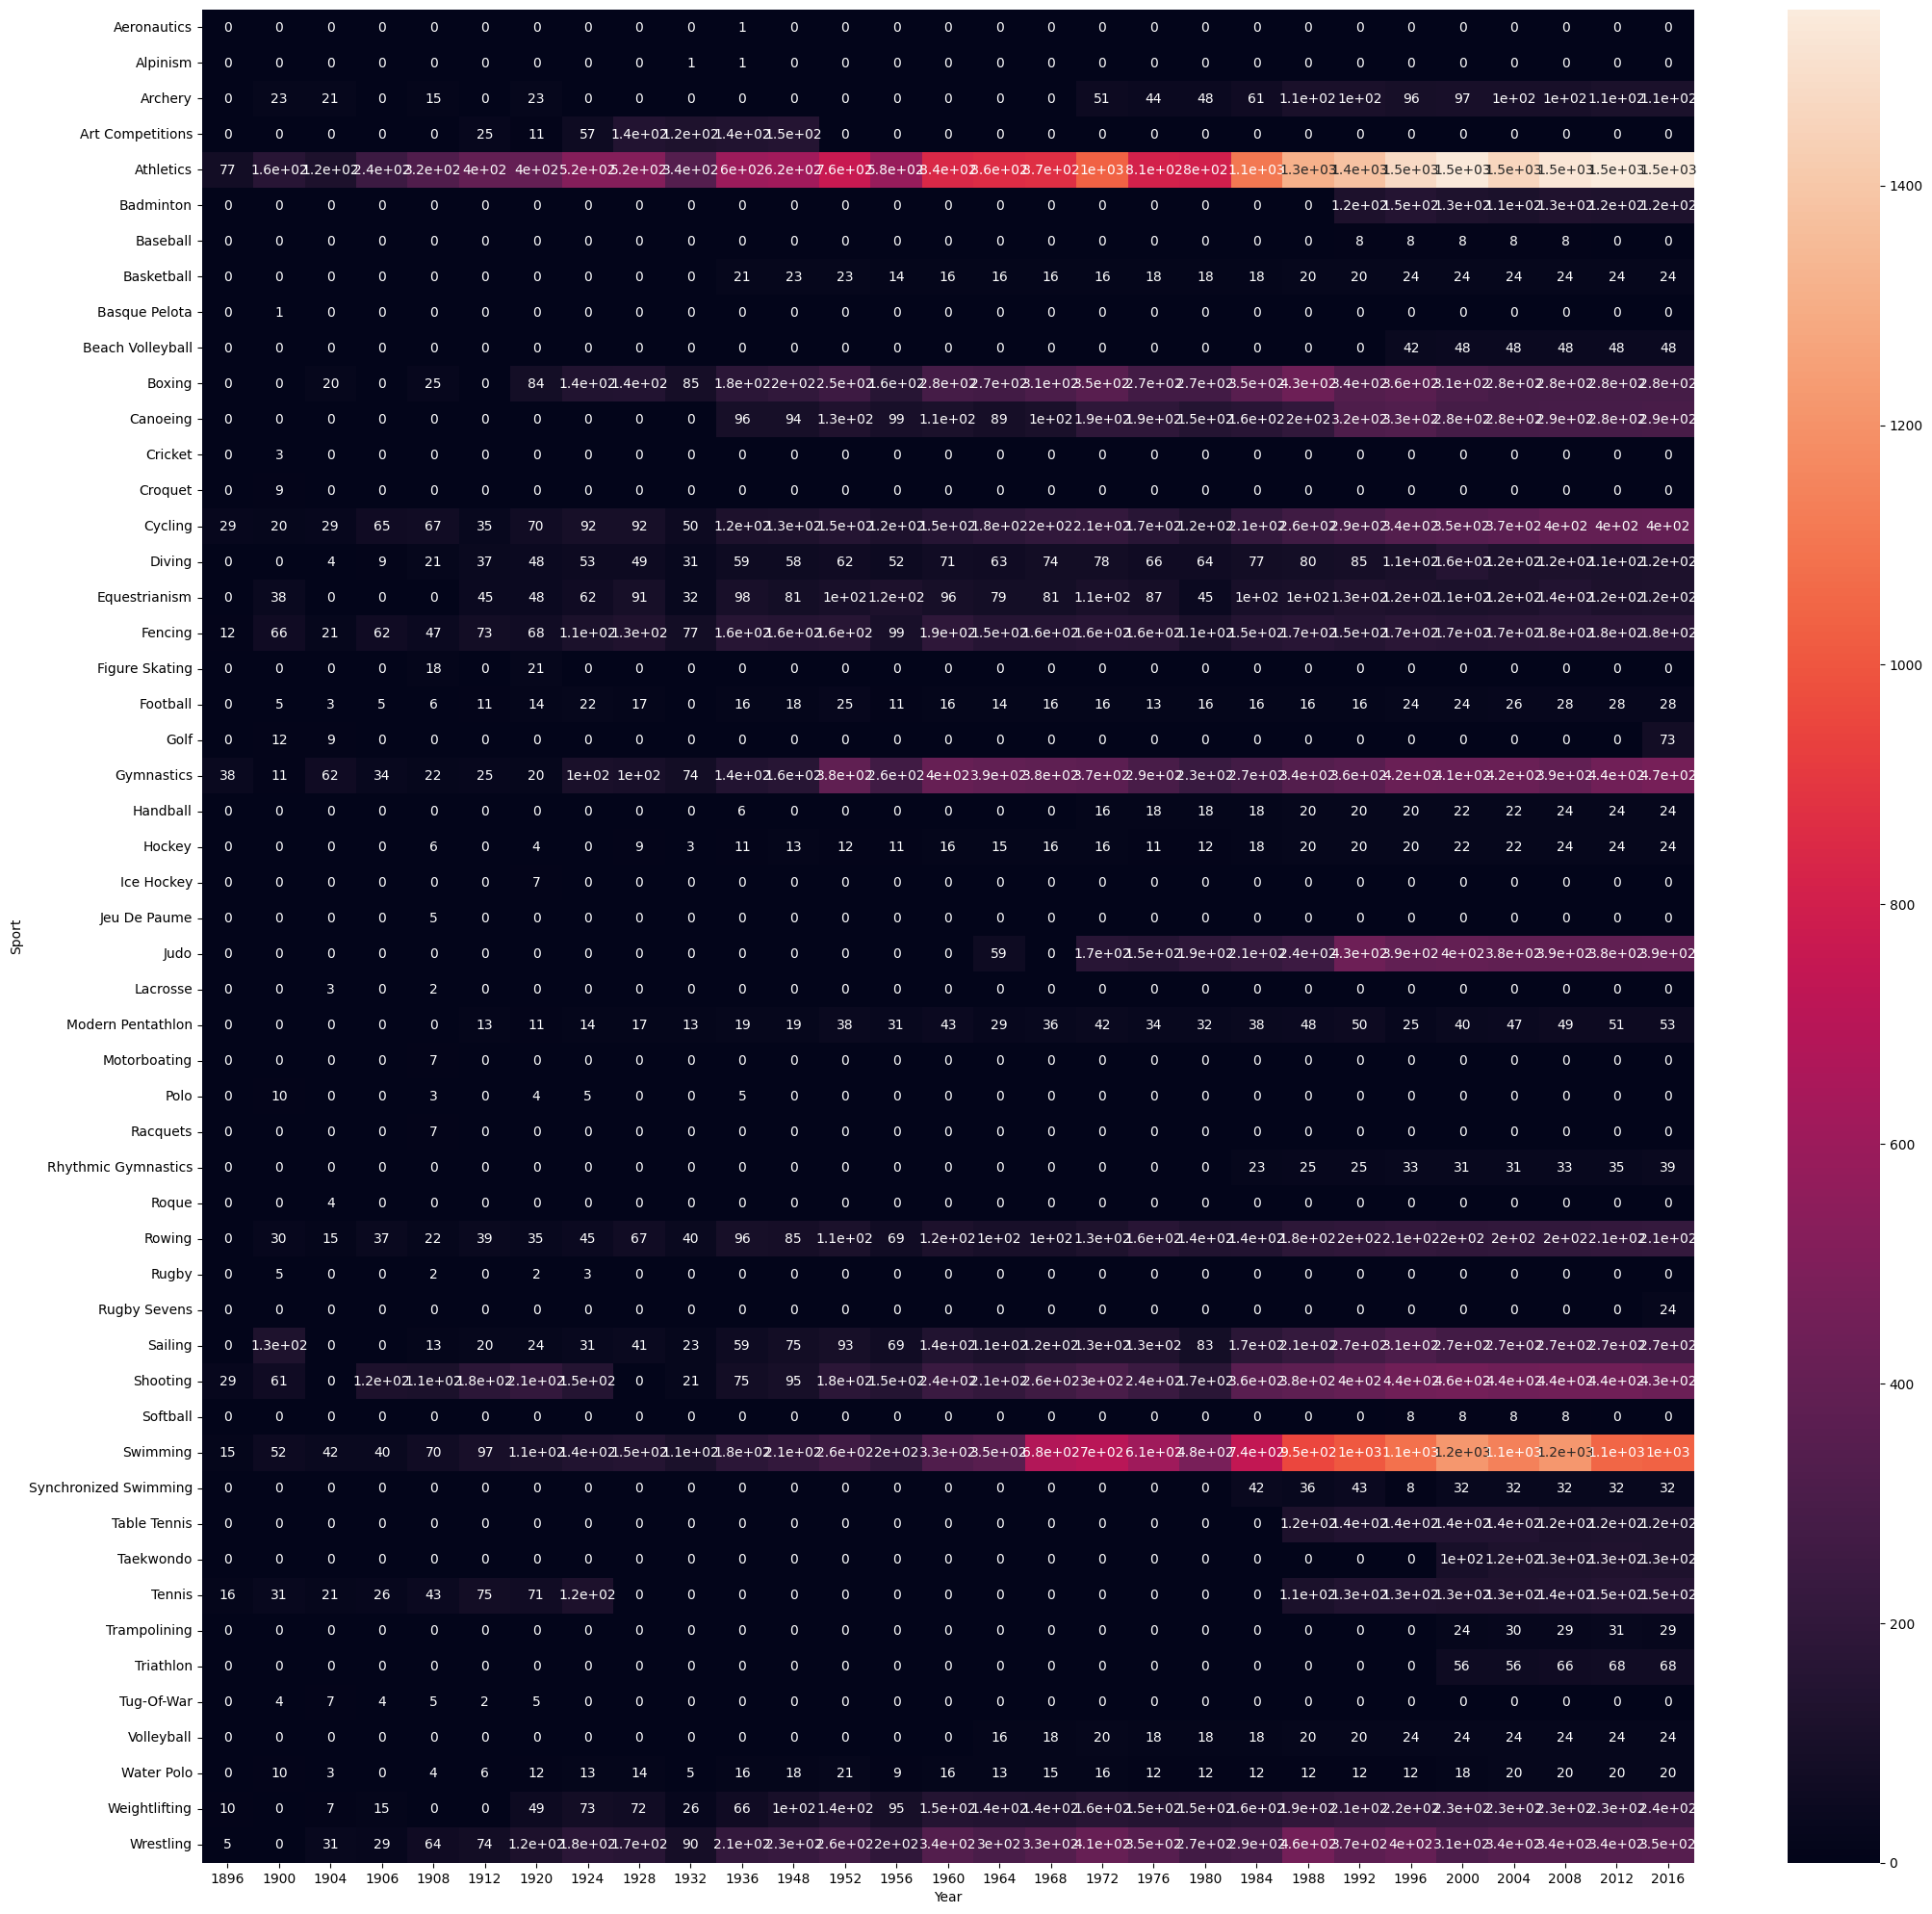

In [ ]:
plt.figure(figsize=(25,25))
sns.heatmap(merged_df.pivot_table(index='Sport',columns='Year',values='Event',aggfunc='count').fillna(0).astype('int'),annot=True)

In [ ]:
def most_successful(df,sport):
  temp_df = df.dropna(subset =['Medal'])
  if sport != 'Overall':
    temp_df = temp_df[temp_df['Sport'] == sport]
  x = temp_df['Name'].value_counts().reset_index().head()
  return x

In [ ]:
most_successful(df,'Swimming')

,Name,count
0,"Michael Fred Phelps, II",28
1,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",12
2,"Dara Grace Torres (-Hoffman, -Minas)",12
3,Ryan Steven Lochte,12
4,Natalie Anne Coughlin (-Hall),12


country wise analysis

In [ ]:
temp_df = df.dropna(subset = ['Medal'])
temp_df.drop_duplicates(['Team','NOC','Games','Year','Season','City','Sport','Medal'],inplace = True)


<ipython-input-25-e9daffa5b378>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df.drop_duplicates(['Team','NOC','Games','Year','Season','City','Sport','Medal'],inplace = True)


In [ ]:
new_df = temp_df[temp_df['Team']=='India']
new_df.groupby('Year').count()['Medal'].reset_index()

,Year,Medal
0,1900,1
1,1928,1
2,1932,1
3,1936,1
4,1948,1
5,1952,2
6,1956,1
7,1960,1
8,1964,1
9,1968,1


In [ ]:
# on the basis of country
def most_successfull(df,country):
  temp_df = df.dropna(subset =['Medal'])
  if country != 'Overall':
    temp_df = temp_df[temp_df['Team'] == country]
  x = temp_df['Name'].value_counts().reset_index().head()
  return x

In [ ]:
most_successfull(df,'United States')

,Name,count
0,"Michael Fred Phelps, II",28
1,Natalie Anne Coughlin (-Hall),12
2,Ryan Steven Lochte,12
3,"Dara Grace Torres (-Hoffman, -Minas)",12
4,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",12
